# House Prices - ML

**Situation:** This Notebook is based on Kaggle's House Prices dataset. The goal is to correctly predict the price of the houses.  
Evaluation Method is RMSE.  
There are a lot of columns so it will be a big part cleaning the data and identifying the relevant features.  
  

**Methodology:**


Basic procedure:  
1. Step: Import modules / load data
2. Step: EDA 
3. Step: Pre-select features for the model
4. Step: Train models 
5. Step: Discussion of results

### 1. Step: Import modules / load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
sns.set_theme(style='darkgrid', palette='Set1')
cmap = 'BrBG'
import warnings
warnings.filterwarnings('ignore')
from math import floor

In [2]:
train = pd.read_csv(r'data/train.csv')
test = pd.read_csv(r'data/test.csv')
#submission_sample = pd.read_csv(r'gender_submission.csv')

### 2. Step: EDA & cleaning

In [3]:
print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (1460, 81)
test shape:  (1459, 80)


So we have 1460 data for training and 1459 for testing.  
Also, we have 80 features + our target variable  
Let's get into the data. First, get an overview of the provided features.  

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

I worked through the data explanation textfile and could identify the following features:  
'SalePrice' is our target variable.  
'ID' is just the index.  

There are 36 numerical features.  
2 of them are actually categorical ('MSSubCLass' and 'MoSold') and need some engineering.  

There are 43 categorical features.  
22 of them are binary or ordinal scaled and can be transformed to numerical features, which we would prefer.

In [5]:
columns= train.columns
target_feature = ['SalePrice']
numerical_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                     '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                     'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','YrSold']
categorical_to_numerical_features = ['Street', 'Alley','LotShape','Utilities','LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
                    'ExterCond']
numerical_to_categorical_features = ['MoSold', 'MSSubClass']
categorical_features = ['Fence','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                       'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

Before we transform these variables to their final type, let's check the quality.  

In [6]:
print('_____Missing Values_____: \n')
columns_with_missing_values = []
for column in columns:
    try:
        if train[column].isnull().sum() + test[column].isnull().sum() > 0:
            columns_with_missing_values.append(column)
            print(column + ' (Train/Test): '+ 
              str(round(train[column].isnull().sum()/len(train[column])*100,2))+'%'+'/'+
              str(round(test[column].isnull().sum()/len(test[column])*100,2))+'%')
    except:
        pass
print('')
print('Total number of features with missing values: ', len(columns_with_missing_values))

_____Missing Values_____: 

MSZoning (Train/Test): 0.0%/0.27%
LotFrontage (Train/Test): 17.74%/15.56%
Alley (Train/Test): 93.77%/92.67%
Utilities (Train/Test): 0.0%/0.14%
Exterior1st (Train/Test): 0.0%/0.07%
Exterior2nd (Train/Test): 0.0%/0.07%
MasVnrType (Train/Test): 0.55%/1.1%
MasVnrArea (Train/Test): 0.55%/1.03%
BsmtQual (Train/Test): 2.53%/3.02%
BsmtCond (Train/Test): 2.53%/3.08%
BsmtExposure (Train/Test): 2.6%/3.02%
BsmtFinType1 (Train/Test): 2.53%/2.88%
BsmtFinSF1 (Train/Test): 0.0%/0.07%
BsmtFinType2 (Train/Test): 2.6%/2.88%
BsmtFinSF2 (Train/Test): 0.0%/0.07%
BsmtUnfSF (Train/Test): 0.0%/0.07%
TotalBsmtSF (Train/Test): 0.0%/0.07%
Electrical (Train/Test): 0.07%/0.0%
BsmtFullBath (Train/Test): 0.0%/0.14%
BsmtHalfBath (Train/Test): 0.0%/0.14%
KitchenQual (Train/Test): 0.0%/0.07%
Functional (Train/Test): 0.0%/0.14%
FireplaceQu (Train/Test): 47.26%/50.03%
GarageType (Train/Test): 5.55%/5.21%
GarageYrBlt (Train/Test): 5.55%/5.35%
GarageFinish (Train/Test): 5.55%/5.35%
GarageCars (Tr

34 features have missing values in the train or test dataset.  
A lot of them are close to 0%, **PoolQuality** is missing nearly everywhere,   
also **alley**, **MiscFeature** and **fence** have many missing values.  
Let go through all of them to evaluate the best method to fill up the missing values.

In [7]:
for i in columns_with_missing_values:
    print(i)
    print(train[i].value_counts())
    print('_'*100)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
____________________________________________________________________________________________________
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
____________________________________________________________________________________________________
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
____________________________________________________________________________________________________
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
____________________________________________________________________________________________________
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng

Based on distribution, datatype and context, we decide which method we use to fill the missing values.

In [8]:
# For categorical features we set the mode, especially if the mode is the median. 
mode = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Electrical','Functional','SaleType','KitchenQual']
# All basement-related missing values are handled as "No Basement", same for fireplace and garage.
# We can check that with the following code (example for fireplaces):
# train[train['FireplaceQu'].isna()==True]['Fireplaces'].sum() 
# It shows that FirePlaceQu is only missing when there is no Fireplace
na = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
      'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual',
     'GarageCond','Fence','MiscFeature','PoolQC']
# For LotFrontage we need to replace with numerical values. We use median as it is more robust against outlier
median = ['LotFrontage']
# Alley has just a few entries. We won't use it in the model.
delete = ['Alley']


In [9]:
# function to create a dictionary with the filling values for each column (so we can use it later on the test set)
def fill_missing_values(data):
    #initialize dictionary
    fill_na_dict = {column: None for column in columns_with_missing_values}
    # first start with mode:
    for i in mode:
        fill_na_dict[i] = train[i].mode()[0]   
    for j in na:
        if train[j].dtype == 'O':
            fill_na_dict[j] = 'NA'
        else:            
            fill_na_dict[j]= 0
    for k in delete:
        fill_na_dict[k] = 'drop_column'
    for l in median:
        fill_na_dict[l] = train[l].median()
    return fill_na_dict

#funtion to correct the datasets
def fill_na(dataset, fill_na_dict):
    for i in fill_na_dict:
        if fill_na_dict[i] == 'drop_column':
            dataset.drop(i,1,inplace = True)
        else:
            dataset[i].fillna(value=fill_na_dict[i], inplace = True)
    return dataset

In [10]:
# now create the dict:
fill_na_dict = fill_missing_values(train)

In [11]:
# now fill the values in the datasets
train = fill_na(dataset = train,fill_na_dict = fill_na_dict)
test = fill_na(dataset = test,fill_na_dict = fill_na_dict)

As mentioned earlier, we need to correct the type of every column.    
Therefore we change categorical values to numerical and vice versa.  

In [12]:
def correct_dtypes(dataset):
#Numerical to categorical        
    dataset = dataset.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    
    #Categorical to numerical
    dataset = dataset.replace({
                           "Street" : {"Grvl" : 1, "Pave" : 2},    
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},                       
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},                      
                           "BsmtQual" : {"NA": 0 , "No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},                      
                           "BsmtCond" : {"NA": 0 , "No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                      
                           "BsmtExposure" : {"NA": 0 , "No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"NA": 0 , "No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"NA": 0 , "No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "CentralAir" : {"N" : 0, "Y" : 1},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                      
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "FireplaceQu" : {"NA": 0 , "No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                      
                           "GarageFinish" : { "NA" :  0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                           "GarageQual" : {"NA": 0 , "No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageCond" : {"NA": 0 , "No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "PavedDrive" : {"NA": 0 , "N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"NA": 0 , "No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "ExterCond" : {"NA": 0 , "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}} 
                         )
    return dataset

In [13]:
train = correct_dtypes(train)
test = correct_dtypes(test)

After correcting the feature, we can put the lists together to get a list of all of our features:

In [14]:
numerical_features = numerical_features + categorical_to_numerical_features
numerical_features.remove('Alley')
categorical_features = categorical_features + numerical_to_categorical_features

In [15]:
print('No. of numerical features: ', len(numerical_features))
print('No. of categorical features: ', len(categorical_features))

No. of numerical features:  55
No. of categorical features:  23


We can also create some additional features:

In [16]:
def feature_eng(dataset):
    
    dataset['GarageScore'] = (dataset['GarageQual'] * dataset['GarageCond'])**0.5
    
    
    dataset['OverallScore'] = (dataset['OverallQual'] * dataset['OverallCond'])**0.5
    
    dataset['BsmtScore'] = (dataset['BsmtQual'] * dataset['BsmtCond'])**0.5
    
    dataset['ExterScore'] = (dataset['ExterQual'] * dataset['ExterCond'])**0.5
    
    dataset['NoBath'] = dataset['FullBath'] + 0.5*dataset['HalfBath'] + dataset['BsmtFullBath'] + 0.5*dataset['BsmtHalfBath']
    dataset['Age'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['LastRemod'] = dataset['YrSold'] - dataset['YearRemodAdd']
    dataset['AgeGar'] = dataset['YrSold'] - dataset['GarageYrBlt']
    
    list_of_new_features = ['GarageScore','OverallScore','BsmtScore','ExterScore','NoBath','Age','LastRemod','AgeGar']
    
    return dataset , list_of_new_features

In [17]:
train, new_features = feature_eng(train)
numerical_features = numerical_features + new_features

In [18]:
test, _ = feature_eng(test)

Next step is to check the distribution of the target variable and transform it if it is not normal distributed

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice_log', ylabel='Density'>

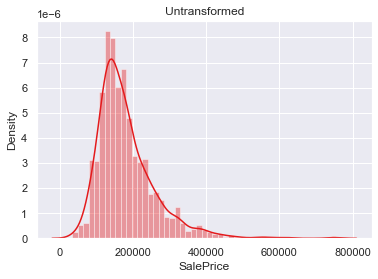

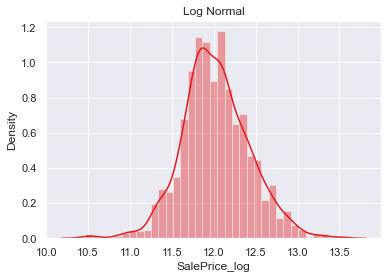

In [19]:
train['SalePrice_log'] = np.log1p(train['SalePrice'].values) 
y = train['SalePrice']
y2 = train['SalePrice_log']
plt.figure(1); plt.title('Untransformed')
sns.distplot(y, kde=True)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y2, kde=True)

In [20]:
# adding the transformed target variable to the feature list
num_core = numerical_features+target_feature
num_core.append('SalePrice_log')
num_core.remove('SalePrice')

<AxesSubplot:>

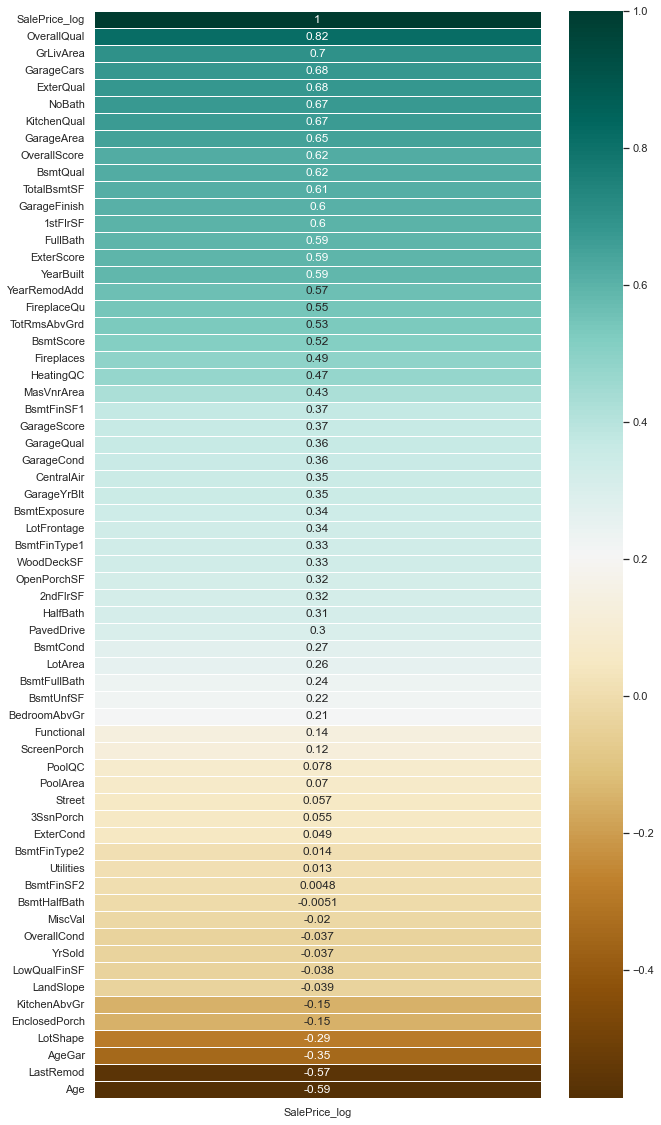

In [21]:
fig, ax = plt.subplots(figsize=(10,20))

sns.heatmap(train[num_core].corr()[['SalePrice_log']].sort_values(by='SalePrice_log',ascending=False),cmap = cmap,annot = True,linewidths=.5)

Many features have a high (negative-) correlation with the SalePrice.  
But we can also identify many features with low or none correlation.  
We will now take a closer look on the scatterplots to understand the relation between the features and the target variable.

In [22]:
# we take the sorting by the correlation while we go through the plots
num_core = train[num_core].corr()[['SalePrice_log']].sort_values(by='SalePrice_log',ascending=False).index.to_list()
corr_dict = train[num_core].corr()[['SalePrice_log']].sort_values(by='SalePrice_log',ascending=False)['SalePrice_log'].to_dict()
target_variable= 'SalePrice_log'

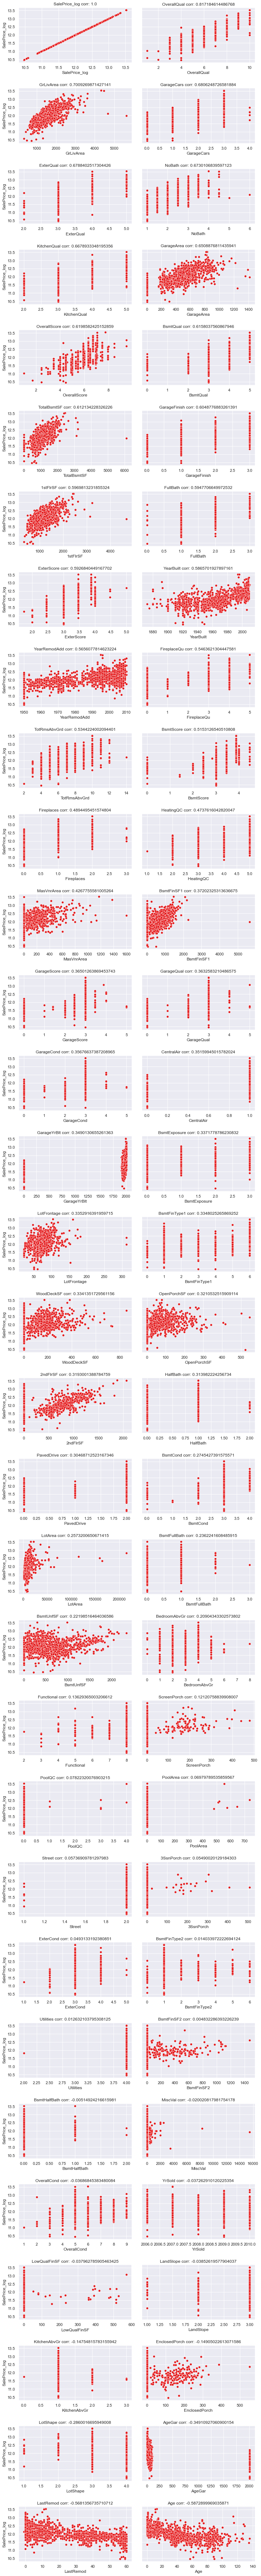

In [23]:
fig, axes = plt.subplots(round(len(numerical_features)/2),2,figsize=(10,100),sharey =True)
fig.tight_layout(h_pad=4)
a = 0
b = 0
for i in num_core:
    sns.scatterplot(data= train, x=train[i], y=train[target_variable], ax = axes[a,b])
    title = i + " corr: " + str(corr_dict[i])
    axes[a,b].set_title(title)
    b+=1
    if b == 2:
        a+=1
        b=0

We can identify several outliers. We will delete some of the greatest outliers.

In [24]:
#Cleaning the outlier
# IQR
outlier = ['GrLivArea', 'GarageArea', 'TotalBsmtSF']
for feature in outlier:
    Q1 = np.percentile(train[feature], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(train[feature], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Upper bound
    upper = np.where(train[feature] >= (Q3+1.5*IQR))
    # Lower bound
    #lower = np.where(train[feature] <= (Q1-1.5*IQR))
    ''' Removing the Outliers '''
    train.drop(upper[0], inplace = True)
    #train.drop(lower[0], inplace = True)
    train.reset_index(drop=True,inplace = True)
train.drop(np.where(train['MasVnrArea'] >= 1200)[0], inplace = True)
train.reset_index(drop=True,inplace = True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1390 non-null   int64  
 1   MSSubClass     1390 non-null   object 
 2   MSZoning       1390 non-null   object 
 3   LotFrontage    1390 non-null   float64
 4   LotArea        1390 non-null   int64  
 5   Street         1390 non-null   int64  
 6   LotShape       1390 non-null   int64  
 7   LandContour    1390 non-null   object 
 8   Utilities      1390 non-null   int64  
 9   LotConfig      1390 non-null   object 
 10  LandSlope      1390 non-null   int64  
 11  Neighborhood   1390 non-null   object 
 12  Condition1     1390 non-null   object 
 13  Condition2     1390 non-null   object 
 14  BldgType       1390 non-null   object 
 15  HouseStyle     1390 non-null   object 
 16  OverallQual    1390 non-null   int64  
 17  OverallCond    1390 non-null   int64  
 18  YearBuil

### 3. Step: Pre-select features for the model

We don't want to fill the model with all features as it might cause different issues like overfitting, multicollinearity and increased computing time/capacity.  
We already did some analysis to make a qualified decision which features we want to remove. We will first choose our set of features by their correlation to the target variable and afterwards deselect all candidates for multicollinearity. 

<AxesSubplot:>

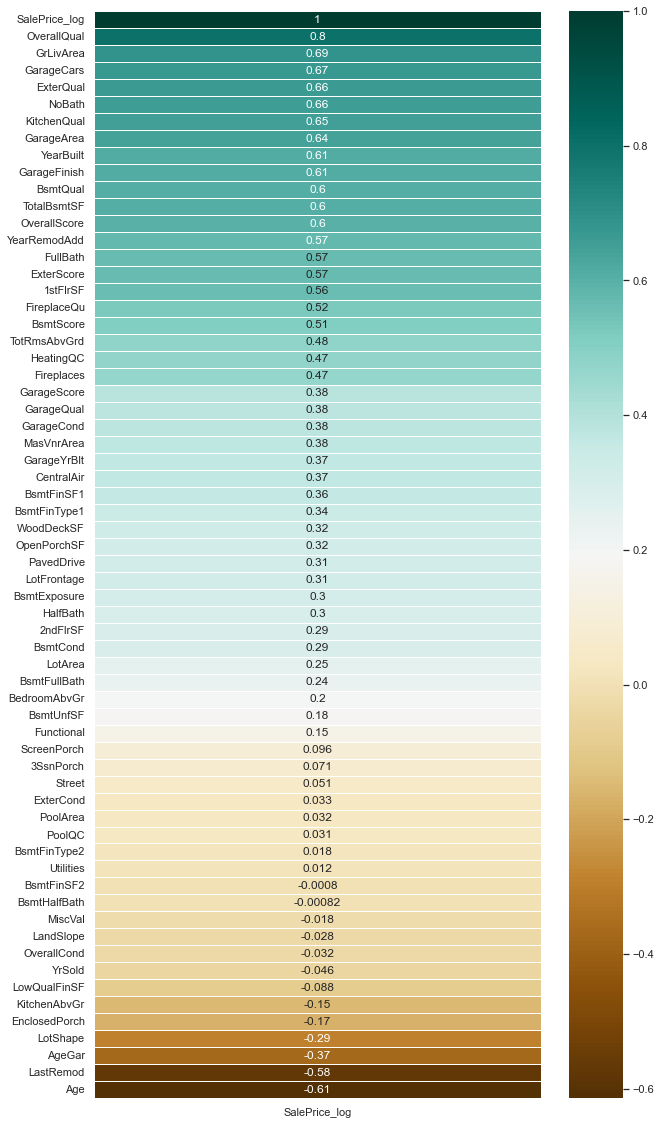

In [26]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(train[num_core].corr()[['SalePrice_log']].sort_values(by='SalePrice_log',ascending=False),cmap = cmap,annot = True,linewidths=.5)

We will choose the absolute value of 0.3 as the lower limit of the correlation coefficient to select the features.   
Some sources name 0.3 as the border from 'weak' to 'moderate' correlation.  
Of course this can not be seen that strict, but as we need a starting point it makes a good way to take this value.  

In [27]:
limit = 0.3
limit_filter = train[num_core].corr()[['SalePrice_log']].abs()>limit
selected_num_features = limit_filter[limit_filter['SalePrice_log']==True].index.to_list()

Now we check for multicollinearity

<AxesSubplot:>

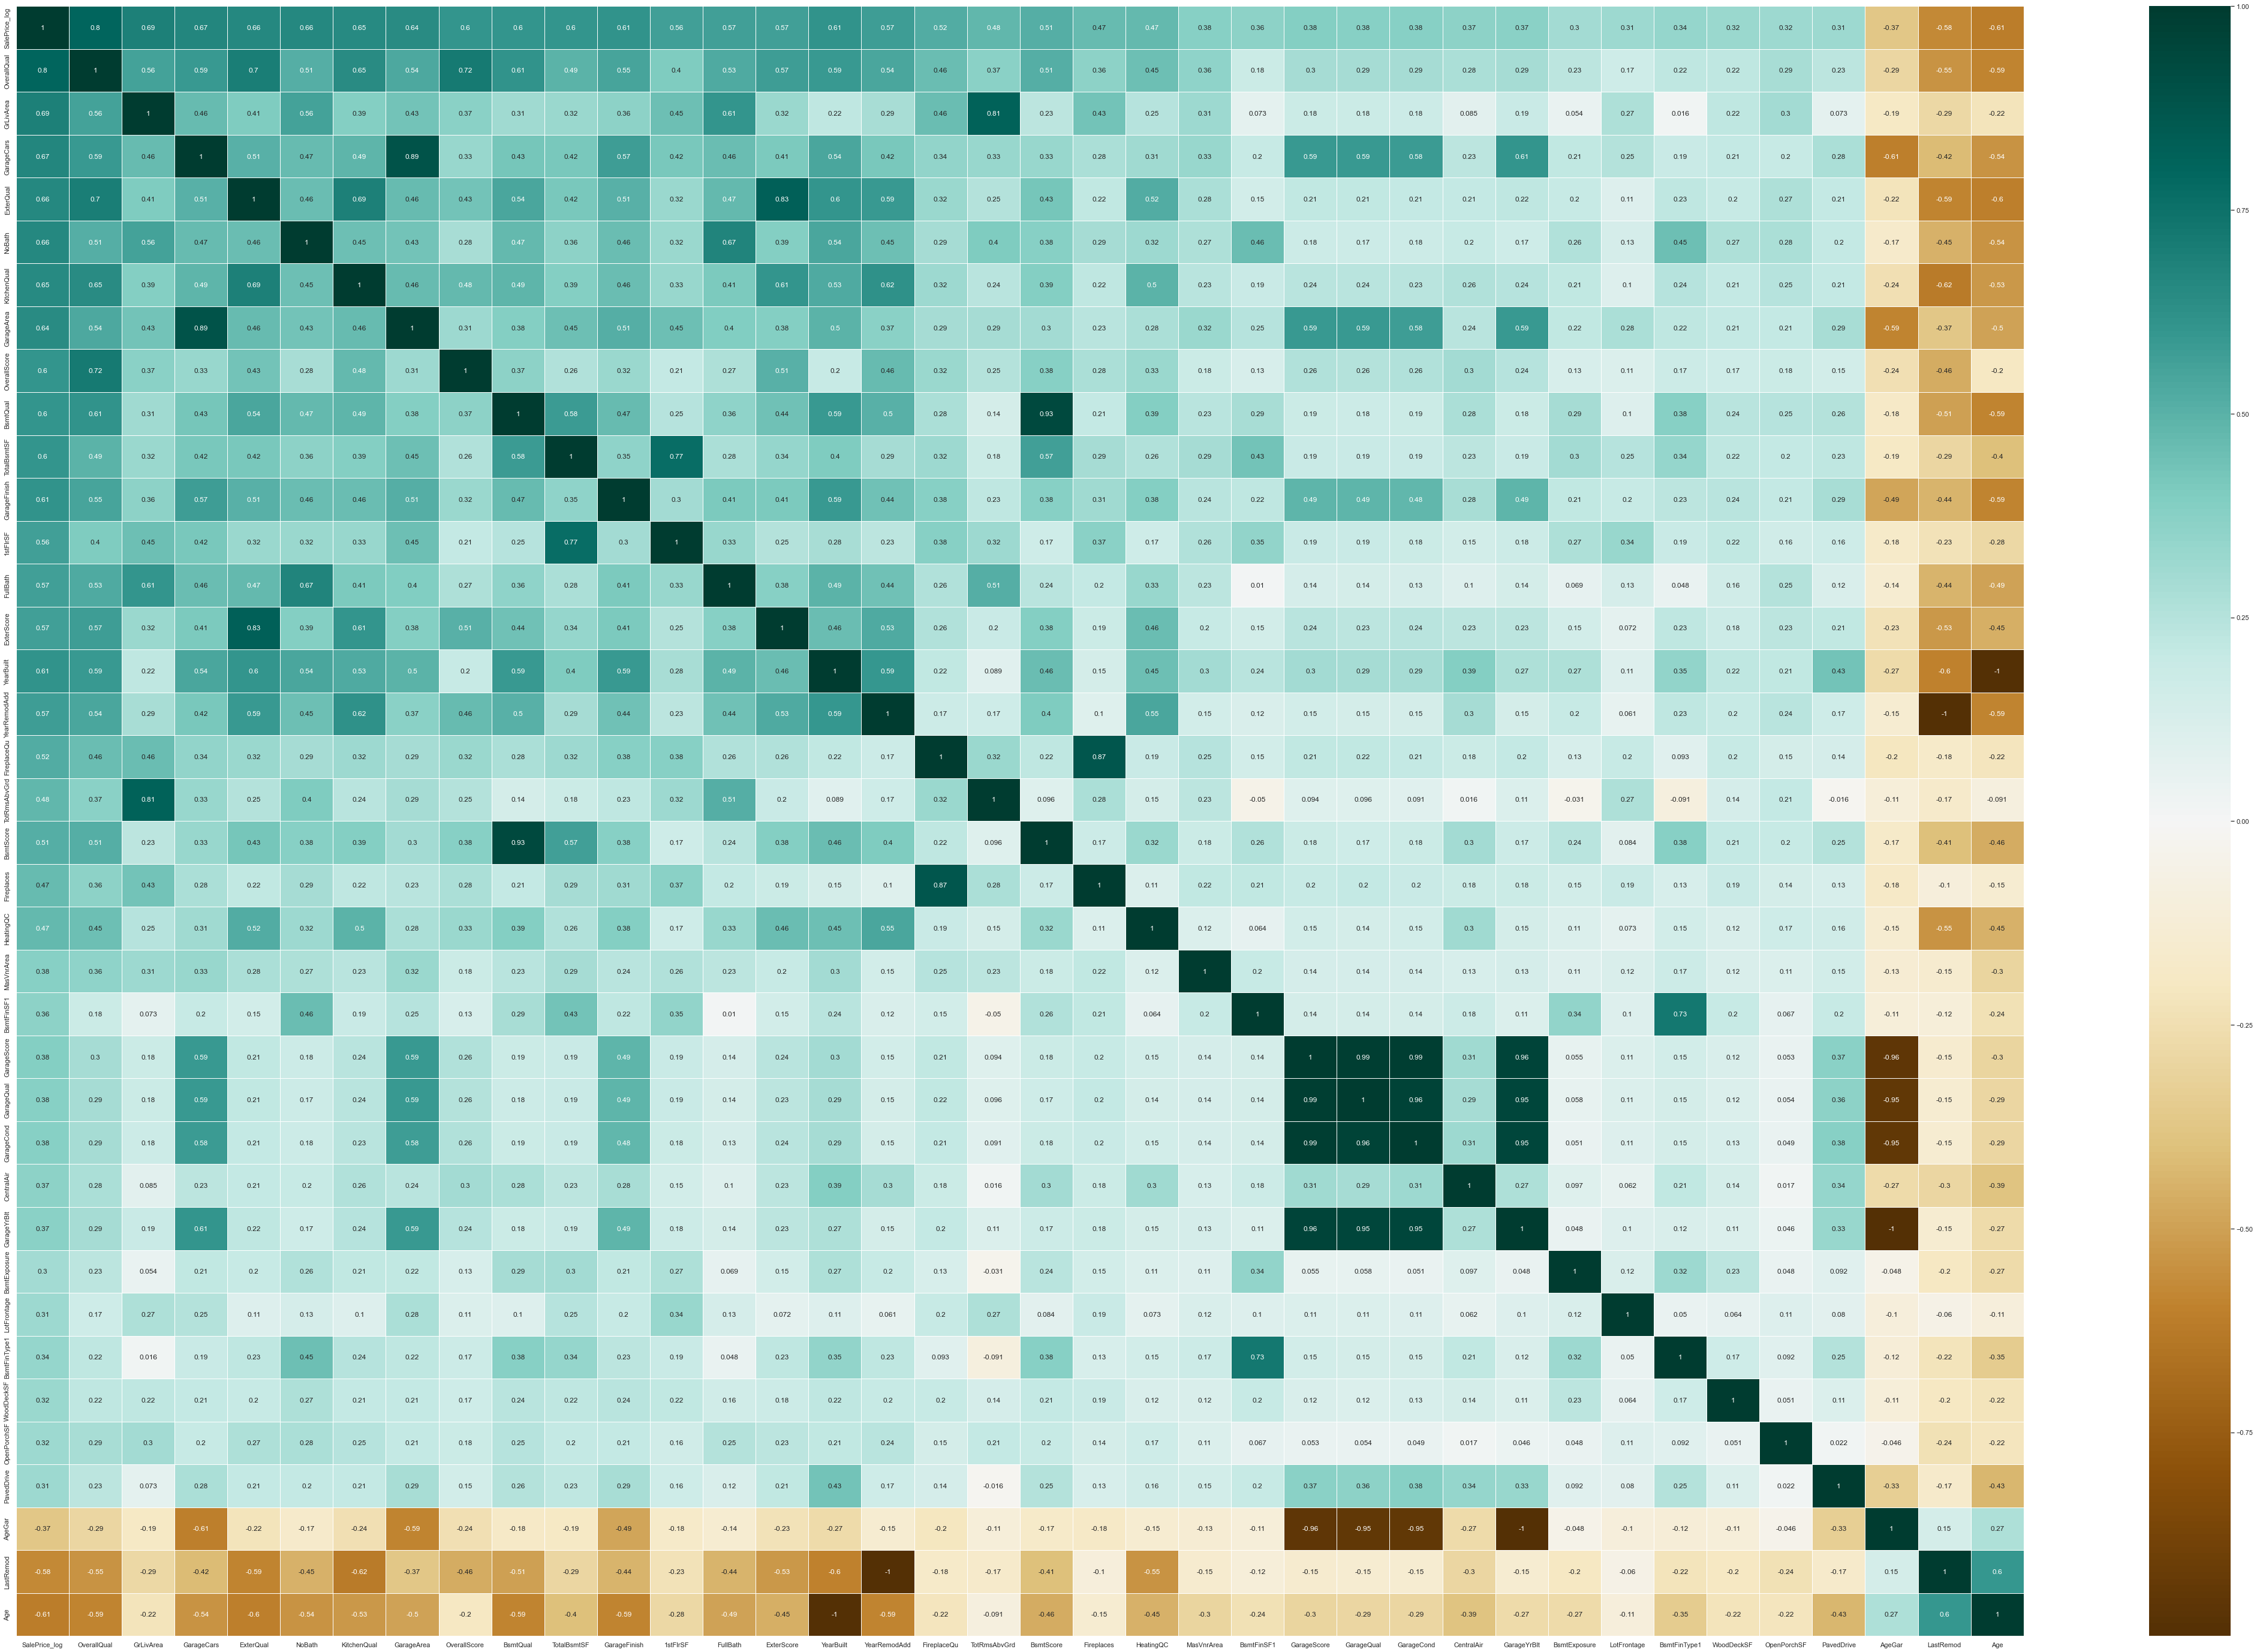

In [28]:
fig, ax = plt.subplots(figsize=(75,50))
sns.heatmap(train[selected_num_features].corr(),cmap = cmap,annot = True,linewidths=.5)

There are a lot of highly intercorrelated variables. We will deselect some redundant now that have an correlation coefficent >0.8.  
We should keep that multicollinearity problem in mind and use PCA and/or models that can work with that.

In [29]:
remove = ['GarageYrBlt','GarageFinish','GarageArea', 'GarageQual', 'GarageCond','AgeGar','YearBuilt','YearRemodAdd','BsmtFinSF1','TotRmsAbvGrd', 'ExterScore','BsmtScore']
for r in remove:
    selected_num_features.remove(r)

So this will be our final set of numerical features:

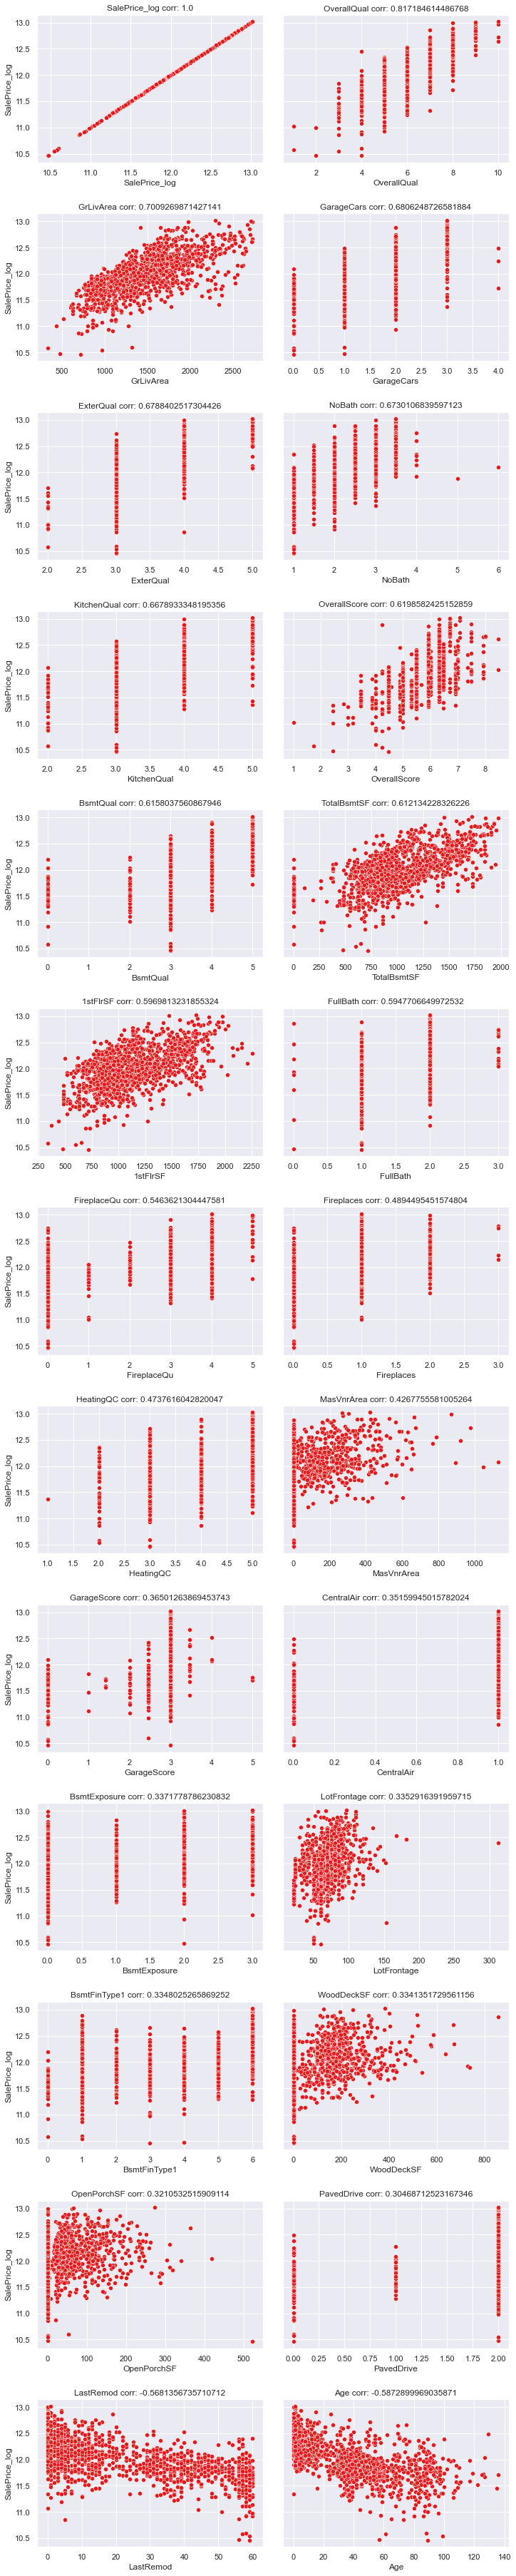

In [30]:
fig, axes = plt.subplots(round(len(selected_num_features)/2),2,figsize=(10,50),sharey =True)
fig.tight_layout(h_pad=4)
a = 0
b = 0
for i in selected_num_features:
    sns.scatterplot(data= train, x=train[i], y=train[target_variable], ax = axes[a,b])
    title = i + " corr: " + str(corr_dict[i])
    axes[a,b].set_title(title)
    b+=1
    if b == 2:
        a+=1
        b=0

Let's check the categorical features:

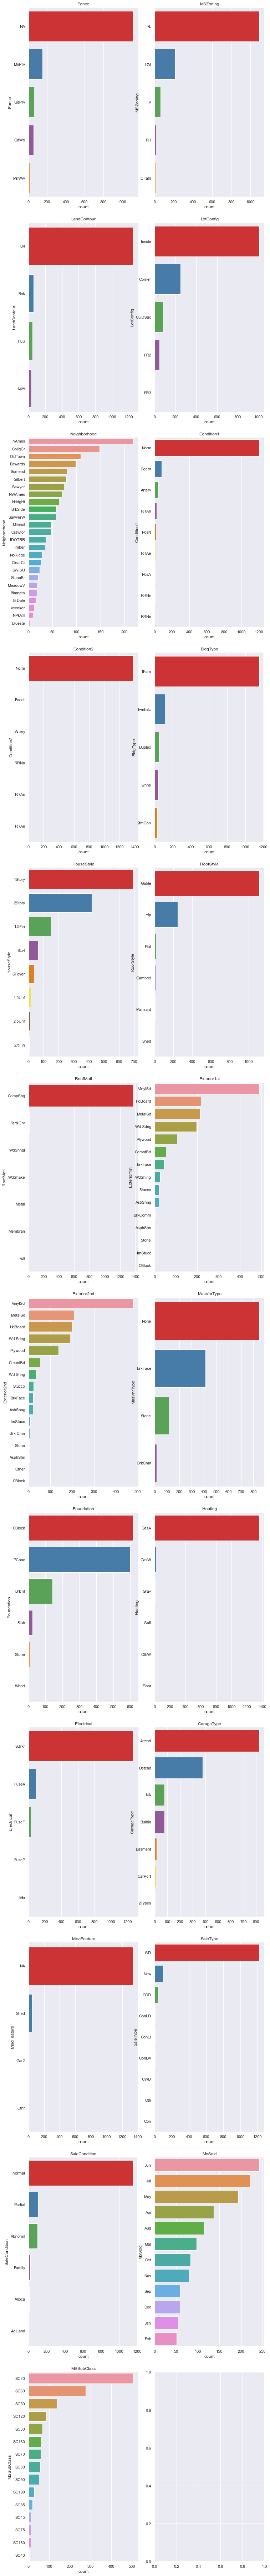

In [31]:
fig, axes = plt.subplots(round(len(categorical_features)/2),2,figsize=(10,100))
fig.tight_layout(h_pad=4)
a = 0
b = 0
for i in categorical_features:
    sns.countplot(data= train, y=train[i], ax = axes[a,b],order = train[i].value_counts().index)
    title = i
    axes[a,b].set_title(title)
    b+=1
    if b == 2:
        a+=1
        b=0

In some features, nearly all values are concentrated in one category and the sample sizes of the other categories are too small to generate valid predictions from it.  
Therefore, we will remove:  

    - Condition2  
    - RoofMatl  
    - Heating  
    - MiscFeature  

A lot of the other features are also concentrated in one category. In the model, we will use pca, transformation and scaling to improve them.  

In [32]:
categorical_features.remove('Condition2')
categorical_features.remove('RoofMatl')
categorical_features.remove('Heating')
categorical_features.remove('MiscFeature')
selected_categorical_features = categorical_features

In [33]:
selected_num_features.remove('SalePrice_log')
all_features = selected_categorical_features + selected_num_features

### 4.Step: Train models

Preprocessing

In [34]:
#models preprocessing
#encode
target = train[['SalePrice_log']]
train = train[all_features]
#train[selected_categorical_features] = pd.get_dummies(train[selected_categorical_features])
train = pd.get_dummies(train)


In [35]:
test = test[all_features]
test = pd.get_dummies(test)

In [36]:
#train_test_split to get a validation dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.20, random_state = 28112015)

In [37]:
#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train[selected_num_features] = scaler.fit_transform(X_train[selected_num_features])
X_test[selected_num_features] = scaler.transform(X_test[selected_num_features])

#also scale the test dataset
test[selected_num_features] = scaler.transform(test[selected_num_features])


In [38]:
# We will use pca to reduce multicollinearity 
# inspired by https://towardsdatascience.com/one-hot-encoding-standardization-pca-data-preparation-steps-for-segmentation-in-python-24d07671cf0b
from sklearn.decomposition import PCA

for comp in range(3, X_train.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X_train)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.99:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
X_train_pca = Final_PCA.fit_transform(X_train)
X_test_pca =Final_PCA.transform(X_test)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 120 components, we can explain 0.9901329837213014% of the variability in the original data.


#### Train the models:

In [39]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [40]:
#dictionary to store results
models = [
    { "model": "1. Linear Regression" },
    { "model": "2. Ridge Regression" },
    { "model": "3. Lasso Regression" },
    { "model": "4. Elastic Net" },
    { "model": "5. KNN" },
    { "model": "6. SVM" },
    { "model": "7. Decision Tree" },
    { "model": "8. Random Forest" },
    { "model": "9. GBM" },
    { "model": "10. LGBM" },
    { "model": "11. XGBoost" },
    ]
scores_dict = {model["model"]: [] for model in models}

In [41]:
#helper for plots
def plot_res(y_train_pred,y_train,y_test_pred,y_test):
    # Plot residuals
    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data",alpha=0.4)
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.6)
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
    plt.show()

    # Plot predictions
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data", alpha=0.4)
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.6)
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

def plot_feat1(algo,index = X_train):
    # Plot important coefficients
    coefs = pd.Series(algo.coef_[0], index = X_train.columns)
    print("Model picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
          str(sum(coefs == 0)) + " features")
    imp_coefs = pd.concat([coefs.sort_values().head(10),
                         coefs.sort_values().tail(10)])
    imp_coefs.plot(kind = "barh")
    title = "Coefficients in the Model"
    plt.title(title)
    plt.show()
    
def plot_feat2(algo,index = X_train):
    # Plot important coefficients
    coefs = pd.Series(algo.coef_, index = X_train.columns)
    print("Model picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
          str(sum(coefs == 0)) + " features")
    imp_coefs = pd.concat([coefs.sort_values().head(10),
                         coefs.sort_values().tail(10)])
    imp_coefs.plot(kind = "barh")
    title = "Coefficients in the Model"
    plt.title(title)
    plt.show()

def plot_feat3(algo,index = X_train):
    # Feature importances
    Feature = pd.DataFrame({'feature':index.columns, 'importance':list(algo.feature_importances_)}).sort_values('importance', ascending=False)
    plt.figure(figsize=(16,4))
    sns.barplot(data=Feature.head(10), x='feature', y='importance')
    plt.xticks(rotation=90)
    plt.show()

def plot_res4(y_train_pred,y_train,y_test_pred,y_test):
    # Plot residuals
    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data",alpha=0.4)
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.6)
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0, xmin = 0, xmax = 400000, color = "red")
    plt.show()
    
        # Plot predictions
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data", alpha=0.4)
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.6)
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([0, 400000], [0, 400000], c = "red")
    plt.show()
    

**1. Linear Regression**

Training error (RMSE): 0.10491399864680807
Test error (RMSE): 0.12018711678755616


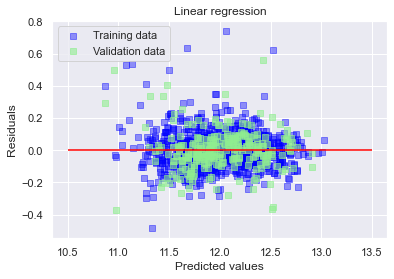

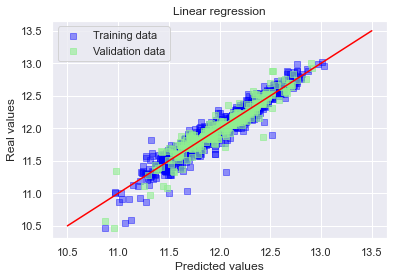

In [42]:
# Linear Regression with PCA
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

train_error = mean_squared_error(y_train, y_train_pred,squared=False)
test_error = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training error (RMSE): ' + str(train_error))
print('Test error (RMSE): ' + str(test_error))


plot_res(y_train_pred,y_train,y_test_pred,y_test)

scores_dict['1. Linear Regression'].append(test_error)

**2. Ridge Regression**

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 3.1500000000000004
Ridge RMSE on Training set : 0.10109077674127936
Ridge RMSE on Test set : 0.11621535509292596


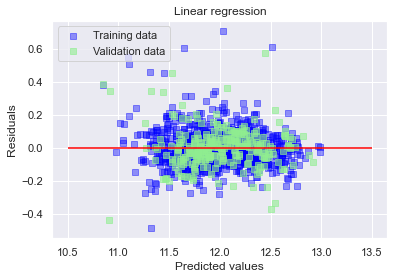

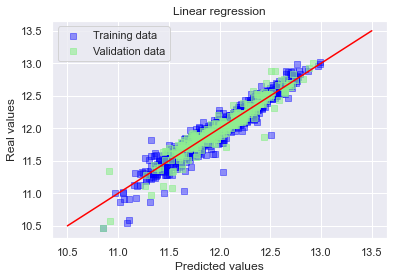

Model picked 188 features and eliminated the other 4 features


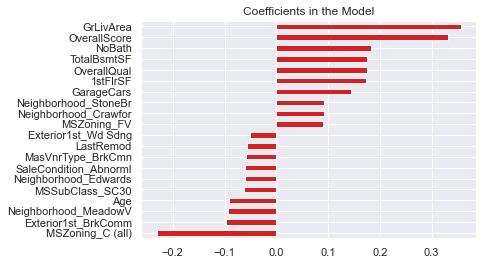

In [43]:
from sklearn.linear_model import RidgeCV
# 2 Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
train_error = mean_squared_error(y_train, y_train_rdg,squared=False)
test_error = mean_squared_error(y_test, y_test_rdg,squared=False)

print("Ridge RMSE on Training set :", train_error)
print("Ridge RMSE on Test set :", test_error)

plot_res(y_train_rdg,y_train,y_test_rdg,y_test)

# Plot important coefficients
plot_feat1(ridge)

scores_dict['2. Ridge Regression'].append(test_error)

**3. Lasso Regression**

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00057
Lasso RMSE on Training set : 0.10476231323282202
Lasso RMSE on Test set : 0.1123846417210776


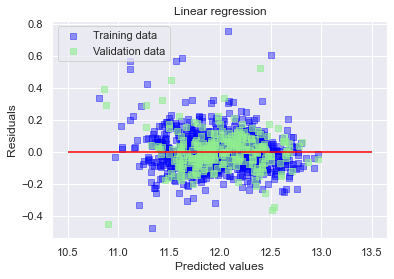

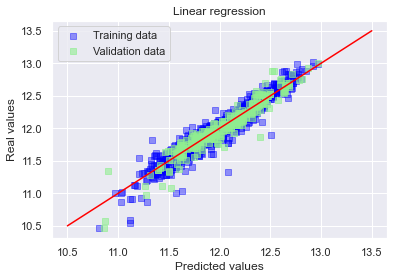

Model picked 78 features and eliminated the other 114 features


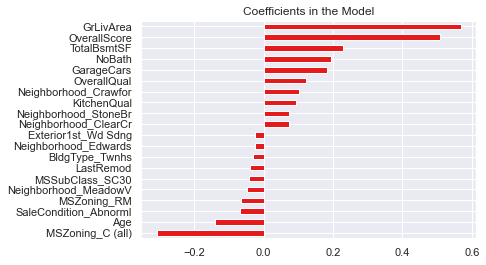

In [44]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)
train_error = mean_squared_error(y_train, y_train_las,squared=False)
test_error = mean_squared_error(y_test, y_test_las,squared=False)

print("Lasso RMSE on Training set :", train_error)
print("Lasso RMSE on Test set :", test_error)

plot_res(y_train_las.reshape(1112,1),y_train,y_test_las.reshape(278,1),y_test)

plot_feat2(algo=lasso)


scores_dict['3. Lasso Regression'].append(test_error)

**4. Elastic Net**

Best l1_ratio : 0.95
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.95
Best l1_ratio : 0.95
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.95 and alpha centered around 0.0006
Best l1_ratio : 0.95
Best alpha : 0.00057
ElasticNet RMSE on Training set : 0.10449681078633474
ElasticNet RMSE on Test set : 0.11238729662365816


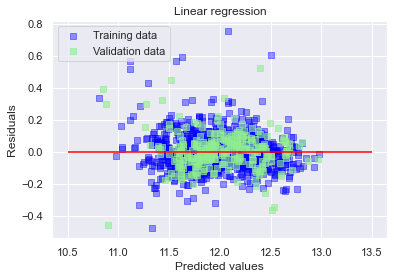

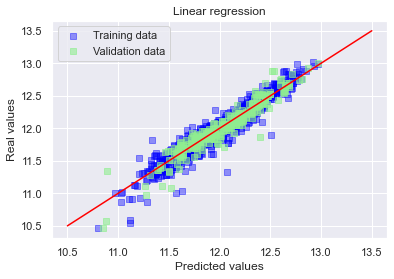

Model picked 79 features and eliminated the other 113 features


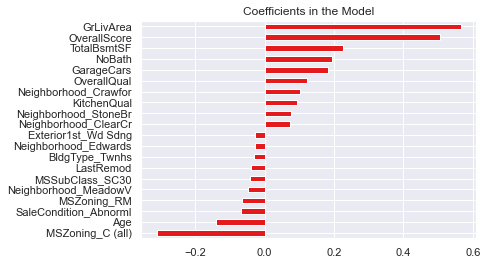

In [45]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

train_error = mean_squared_error(y_train, y_train_ela,squared=False)
test_error = mean_squared_error(y_test, y_test_ela,squared=False)

print("ElasticNet RMSE on Training set :",train_error)
print("ElasticNet RMSE on Test set :", test_error)

scores_dict['4. Elastic Net'].append(test_error)

plot_res(y_train_ela.reshape(1112,1),y_train,y_test_ela.reshape(278,1),y_test)

plot_feat2(algo=elasticNet)


**5. KNN**

In [46]:
from bayes_opt import BayesianOptimization
# inspired by https://www.kaggle.com/rendyk/regression-rmse-house-prices

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def knn_re_bo(n_neighbors, weights, algorithm):
    params_knn = {}
    
    weightsL = ['uniform', 'distance']
    algorithmL = ['auto', 'ball_tree', 'kd_tree', 'brute', 'brute']
    
    params_knn['n_neighbors'] = round(n_neighbors)
    params_knn['weights'] = weightsL[round(weights)]
    params_knn['algorithm'] = algorithmL[round(algorithm)]
    params_knn['n_jobs'] = -1
    
    scores = cross_val_score(KNeighborsRegressor(**params_knn),
                             X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set hyperparameters spaces
params_knn ={
    'n_neighbors':(3, 20),
    'weights':(0,1),
    'algorithm':(0, 4)
}

# Run Bayesian Optimization
knn_bo = BayesianOptimization(knn_re_bo, params_knn, random_state=42)
knn_bo.maximize(init_points=5, n_iter=50)



|   iter    |  target   | algorithm | n_neig... |  weights  |
-------------------------------------------------------------
|  1        | -0.2021   |  1.498    |  19.16    |  0.732    |
|  2        | -0.2011   |  2.395    |  5.652    |  0.156    |
|  3        | -0.2015   |  0.2323   |  17.72    |  0.6011   |
|  4        | -0.2061   |  2.832    |  3.35     |  0.9699   |
|  5        | -0.2002   |  3.33     |  6.61     |  0.1818   |
|  6        | -0.2004   |  1.932    |  7.751    |  0.0      |
|  7        | -0.1977   |  4.0      |  9.351    |  1.0      |
|  8        | -0.1977   |  4.0      |  11.68    |  1.0      |
|  9        | -0.1977   |  0.8479   |  12.12    |  1.0      |
|  10       | -0.2003   |  2.881    |  14.2     |  0.0      |
|  11       | -0.2002   |  2.427    |  10.91    |  0.0      |
|  12       | -0.1979   |  0.0      |  13.87    |  1.0      |
|  13       | -0.1974   |  0.05138  |  10.21    |  0.9984   |
|  14       | -0.1999   |  0.0      |  12.03    |  0.0      |
|  15   

In [48]:
# Best hyperparameters
params_knn = knn_bo.max['params']

weightsL = ['uniform', 'distance']
algorithmL = ['auto', 'ball_tree', 'kd_tree', 'brute', 'brute']

params_knn['n_neighbors'] = round(params_knn['n_neighbors'])
params_knn['weights'] = weightsL[round(params_knn['weights'])]
params_knn['algorithm'] = algorithmL[floor(params_knn['algorithm'])]
params_knn['n_jobs'] = -1
params_knn

{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance', 'n_jobs': -1}

KNN RMSE on Training set : 1.7631110107418124e-08
KNN RMSE on Test set : 0.18765671879743048


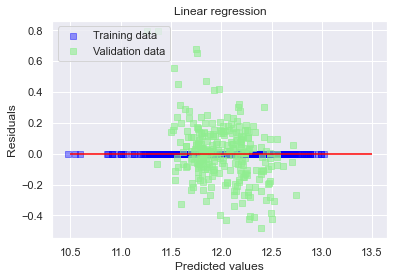

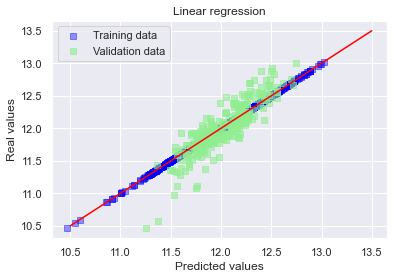

In [49]:
# Fit the training data
knn_hyp =  KNeighborsRegressor(**params_knn)
knn_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_knn = knn_hyp.predict(X_train)
y_test_knn = knn_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_knn,squared=False)
test_error = mean_squared_error(y_test, y_test_knn,squared=False)

print("KNN RMSE on Training set :", train_error)
print("KNN RMSE on Test set :", test_error)

scores_dict['5. KNN'].append(test_error)

plot_res(y_train_knn.reshape(1112,1),y_train,y_test_knn.reshape(278,1),y_test)

**6. SVM**

In [50]:
from sklearn.svm import SVR

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def svm_re_bo(C, epsilon):
    params_svm = {}
    params_svm['C'] = C
    params_svm['epsilon'] = epsilon
    
    scores = cross_val_score(SVR(**params_svm),
                             X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set hyperparameters spaces
params_svm ={
    #'kernel':(0, 5),
    'C':(0.01, 10),
    'epsilon':(0.01, 1)
}

# Run Bayesian Optimization
svm_bo = BayesianOptimization(svm_re_bo, params_svm)
svm_bo.maximize(init_points=5, n_iter=50)

|   iter    |  target   |     C     |  epsilon  |
-------------------------------------------------
|  1        | -0.1274   |  2.563    |  0.03144  |
|  2        | -0.2871   |  3.957    |  0.7248   |
|  3        | -0.2762   |  3.985    |  0.6936   |
|  4        | -0.325    |  4.452    |  0.8346   |
|  5        | -0.137    |  7.138    |  0.124    |
|  6        | -0.1282   |  2.122    |  0.01     |
|  7        | -0.2502   |  2.278    |  0.6123   |
|  8        | -0.1945   |  2.444    |  0.3995   |
|  9        | -0.133    |  7.738    |  0.0941   |
|  10       | -0.2942   |  7.497    |  0.7448   |
|  11       | -0.1308   |  8.281    |  0.01     |
|  12       | -0.1305   |  6.512    |  0.01     |
|  13       | -0.1308   |  9.041    |  0.01     |
|  14       | -0.2773   |  8.972    |  0.6966   |
|  15       | -0.2772   |  9.432    |  0.6964   |
|  16       | -0.13     |  5.834    |  0.01278  |
|  17       | -0.2548   |  6.116    |  0.6278   |
|  18       | -0.1265   |  1.37     |  0.01     |


In [51]:
# Best hyperparameters
params_svm = svm_bo.max['params']
params_svm

{'C': 0.6705828326555916, 'epsilon': 0.01}

SVM RMSE on Training set : 0.06461903451264062
SVM RMSE on Test set : 0.1256669568247046


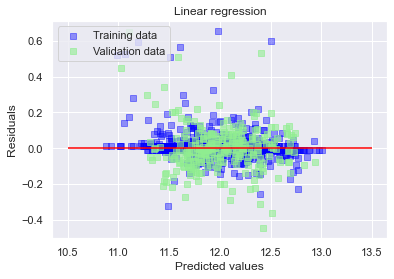

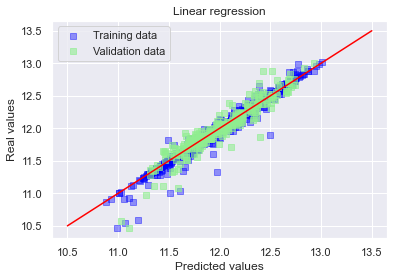

In [52]:
# Fit the training data
svm_hyp =  SVR(**params_svm)
svm_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_svm = svm_hyp.predict(X_train)
y_test_svm = svm_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_svm,squared=False)
test_error = mean_squared_error(y_test, y_test_svm,squared=False)

print("SVM RMSE on Training set :", train_error)
print("SVM RMSE on Test set :", test_error)

plot_res(y_train_svm.reshape(1112,1),y_train,y_test_svm.reshape(278,1),y_test)

scores_dict['6. SVM'].append(test_error)

**7. Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def dt_re_bo(splitter, max_depth, min_samples_split, min_samples_leaf, max_features):
    params_dt = {}
    
    splitterL = ['best', 'random']
    max_featuresL = ['auto', 'sqrt']
    
    params_dt['splitter'] = splitterL[round(splitter)]
    params_dt['max_depth'] = round(max_depth)
    params_dt['min_samples_split'] = round(min_samples_split)
    params_dt['min_samples_leaf'] = round(min_samples_leaf)
    params_dt['max_features'] = max_featuresL[floor(max_features)]
    
    scores = cross_val_score(DecisionTreeRegressor(random_state=42, **params_dt),
                             X_train, y_train, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set hyperparameters spaces
params_dt ={
    'splitter':(0, 1),
    'max_depth':(4, 20),
    'min_samples_split':(1, 10),
    'min_samples_leaf':(1, 10),
    'max_features': (0, 1)
}

# Run Bayesian Optimization
dt_bo = BayesianOptimization(dt_re_bo, params_dt, random_state=42)
dt_bo.maximize(init_points=4, n_iter=40)



|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | splitter  |
-------------------------------------------------------------------------------------
|  1        | -0.1717   |  9.993    |  0.9507   |  7.588    |  6.388    |  0.156    |
|  2        | -0.1853   |  6.496    |  0.05808  |  8.796    |  6.41     |  0.7081   |
|  3        | -0.199    |  4.329    |  0.9699   |  8.492    |  2.911    |  0.1818   |
|  4        | -0.1732   |  6.934    |  0.3042   |  5.723    |  4.888    |  0.2912   |
|  5        | -0.1717   |  9.826    |  0.8524   |  7.809    |  6.495    |  0.3642   |
|  6        | -0.1876   |  9.156    |  0.0      |  2.929    |  7.302    |  1.0      |
|  7        | -0.1854   |  10.03    |  0.0      |  6.673    |  3.644    |  1.0      |
|  8        | -0.222    |  11.29    |  1.0      |  8.331    |  8.123    |  0.0      |
|  9        | -0.171    |  8.817    |  0.7201   |  7.056    |  5.821    |  0.302    |
|  10       | -0.1717   |  9.637    |  0.9489   |  8.4

In [54]:
# Best hyperparameters
params_dt = dt_bo.max['params']

splitterL = ['best', 'random']
max_featuresL = ['auto', 'sqrt']
    
params_dt['splitter'] = splitterL[round(params_dt['splitter'])]
params_dt['max_depth'] = round(params_dt['max_depth'])
params_dt['min_samples_split'] = round(params_dt['min_samples_split'])
params_dt['min_samples_leaf'] = round(params_dt['min_samples_leaf'])
params_dt['max_features'] = max_featuresL[floor(params_dt['max_features'])]
params_dt

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'splitter': 'best'}

DT RMSE on Training set : 0.11009320909803157
DT RMSE on Test set : 0.18024758967126964


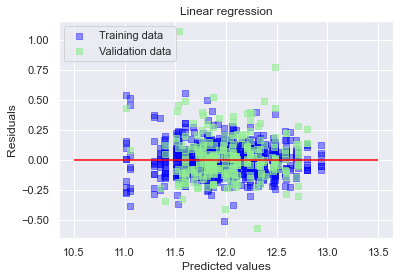

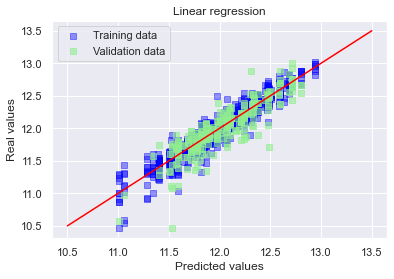

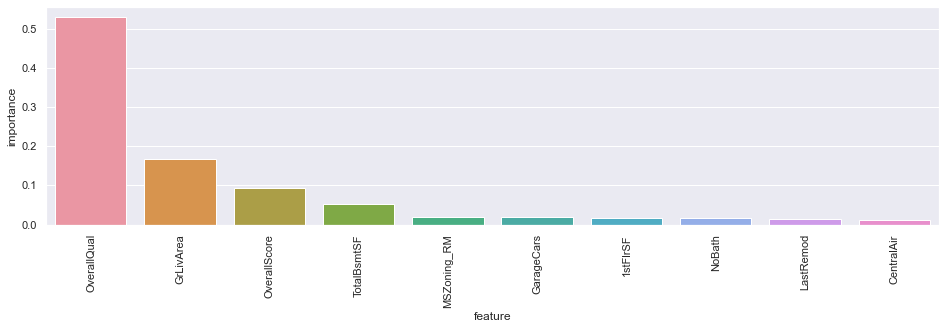

In [55]:
# Fit the training data
dt_hyp =  DecisionTreeRegressor(**params_dt, random_state=42)
dt_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_dt = dt_hyp.predict(X_train)
y_test_dt = dt_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_dt,squared=False)
test_error = mean_squared_error(y_test, y_test_dt,squared=False)

print("DT RMSE on Training set :", train_error)
print("DT RMSE on Test set :", test_error)

plot_res(y_train_dt.reshape(1112,1),y_train,y_test_dt.reshape(278,1),y_test)

plot_feat3(algo=dt_hyp)

scores_dict['7. Decision Tree'].append(test_error)

**8. Random Forest**

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def rf_re_bo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    params_rf = {}
        
    params_rf['n_estimators'] = round(n_estimators)
    params_rf['max_depth'] = round(max_depth)
    params_rf['min_samples_split'] = round(min_samples_split)
    params_rf['min_samples_leaf'] = round(min_samples_leaf)
    params_rf['max_features'] = float(max_features)
    
    scores = cross_val_score(RandomForestRegressor(random_state=123, **params_rf),
                             X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set hyperparameters spaces
params_rf ={
    'n_estimators':(70, 1500),
    'max_depth':(5, 20),
    'min_samples_split':(2, 10),
    'min_samples_leaf': (2, 10),
    'max_features': (0.8,1)
}

# Run Bayesian Optimization
rf_bo = BayesianOptimization(rf_re_bo, params_rf, random_state=123)
rf_bo.maximize(init_points=5, n_iter=50)



|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.132    |  15.45    |  0.8572   |  3.815    |  6.411    |  1.099e+0 |
|  2        | -0.1374   |  11.35    |  0.9962   |  7.479    |  5.847    |  630.7    |
|  3        | -0.1356   |  10.15    |  0.9458   |  5.509    |  2.477    |  639.2    |
|  4        | -0.1309   |  16.07    |  0.8365   |  3.404    |  6.252    |  830.5    |
|  5        | -0.1387   |  14.52    |  0.9699   |  7.796    |  6.888    |  1.103e+0 |
|  6        | -0.1464   |  5.296    |  0.9257   |  3.724    |  3.77     |  988.5    |
|  7        | -0.1385   |  14.86    |  0.8928   |  7.594    |  4.498    |  165.5    |
|  8        | -0.1354   |  17.79    |  0.849    |  6.317    |  5.012    |  195.4    |
|  9        | -0.1321   |  12.79    |  0.815    |  4.39     |  7.043    |  400.2    |
|  10       | -0.1353   |  18.19    |  0.9328   |  6.0

In [57]:
# Best hyperparameters
params_rf = rf_bo.max['params']

params_rf['n_estimators'] = round(params_rf['n_estimators'])
params_rf['max_depth'] = round(params_rf['max_depth'])
params_rf['min_samples_split'] = round(params_rf['min_samples_split'])
params_rf['min_samples_leaf'] = round(params_rf['min_samples_leaf'])
params_rf['max_features'] = float(params_rf['max_features'])
params_rf

{'max_depth': 13,
 'max_features': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1095}

RF RMSE on Training set : 0.06031283483220999
RF RMSE on Test set : 0.1321301036963956


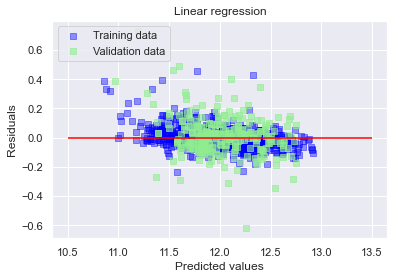

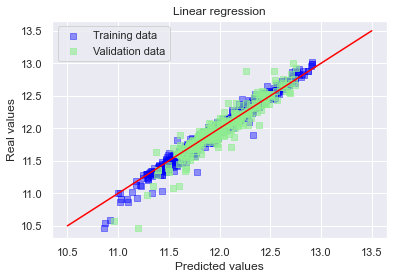

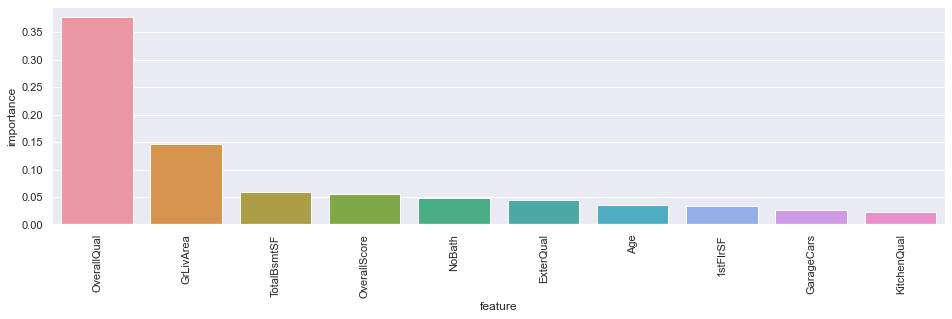

In [58]:
# Fit the training data
rf_hyp =  RandomForestRegressor(**params_rf, random_state=123)
rf_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_rf = rf_hyp.predict(X_train)
y_test_rf = rf_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_rf,squared=False)
test_error = mean_squared_error(y_test, y_test_rf,squared=False)

print("RF RMSE on Training set :", train_error)
print("RF RMSE on Test set :", test_error)

plot_res(y_train_rf.reshape(1112,1),y_train,y_test_rf.reshape(278,1),y_test)

plot_feat3(algo=rf_hyp)

scores_dict['8. Random Forest'].append(test_error)

**9. Gradient Boosting Machine**

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def gbm_re_bo(learning_rate, n_estimators, subsample, max_depth, max_features):
    params_gbm = {}
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = float(max_features)
    
    scores = cross_val_score(GradientBoostingRegressor(random_state=123, **params_gbm),
                             X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set hyperparameters spaces
params_gbm ={
    'learning_rate':(0.01, 1),
    'n_estimators':(10, 1500),
    'subsample': (0.1, 1),
    'max_depth':(1, 20),
    'max_features':(0.8, 1)
}

# Run Bayesian Optimization
gbm_bo = BayesianOptimization(gbm_re_bo, params_gbm, random_state=123)
gbm_bo.maximize(init_points=5, n_iter=50)

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.1797   |  0.6995   |  6.437    |  0.8454   |  831.5    |  0.7475   |
|  2        | -0.1787   |  0.4289   |  19.63    |  0.937    |  726.6    |  0.4529   |
|  3        | -0.1594   |  0.3497   |  14.85    |  0.8877   |  98.92    |  0.4582   |
|  4        | -0.2133   |  0.7406   |  4.467    |  0.8351   |  802.0    |  0.5786   |
|  5        | -0.177    |  0.6381   |  17.14    |  0.9449   |  920.4    |  0.7502   |
|  6        | -0.2905   |  0.3318   |  16.24    |  0.9489   |  99.0     |  0.1654   |
|  7        | -7.38e+08 |  0.6609   |  9.814    |  0.9398   |  475.2    |  0.1601   |
|  8        | -0.1869   |  0.01     |  20.0     |  1.0      |  1.368e+0 |  1.0      |
|  9        | -0.1291   |  0.01     |  1.0      |  0.8      |  1.162e+0 |  0.1      |
|  10       | -1.744e+0 |  1.0      |  1.0      |  0.8

In [60]:
# Best hyperparameters
params_gbm = gbm_bo.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = float(params_gbm['max_features'])
params_gbm

{'learning_rate': 0.01,
 'max_depth': 20,
 'max_features': 0.8,
 'n_estimators': 1500,
 'subsample': 0.1}

GBM RMSE on Training set : 0.04573199322516992
GBM RMSE on Test set : 0.11318263969465543


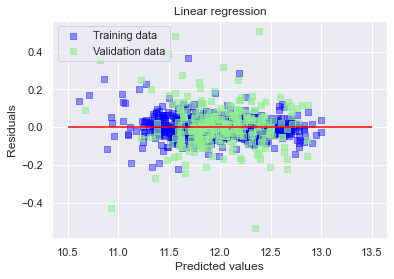

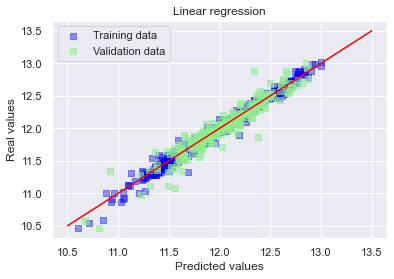

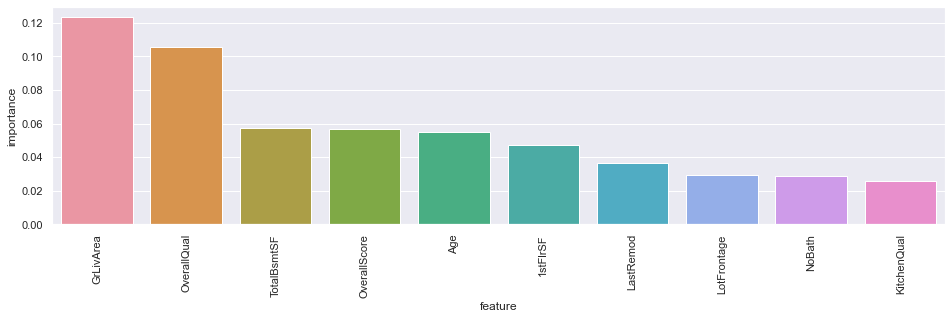

In [61]:
# Fit the training data
gbm_hyp =  GradientBoostingRegressor(**params_gbm, random_state=123)
gbm_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_gbm = gbm_hyp.predict(X_train)
y_test_gbm = gbm_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_gbm,squared=False)
test_error = mean_squared_error(y_test, y_test_gbm,squared=False)

print("GBM RMSE on Training set :", train_error)
print("GBM RMSE on Test set :", test_error)

plot_res(y_train_gbm.reshape(1112,1),y_train,y_test_gbm.reshape(278,1),y_test)

plot_feat3(algo=gbm_hyp)

scores_dict['9. GBM'].append(test_error)


**10. LightGBM**

In [62]:
from lightgbm import LGBMRegressor

# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_re_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree,n_estimators):
    params_lgbm = {'objective': 'regression'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    params_lgbm['n_estimators'] = int(n_estimators)
    
    scores = cross_val_score(LGBMRegressor(random_state=42, **params_lgbm),
                            X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.1,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.01, 0.9),
    'min_child_weight':(1e-5, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'n_estimators':(10,300)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_re_bo, params_lgbm, random_state=123)
lgbm_bo.maximize(init_points=4, n_iter=40)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1341   |  0.8482   |  0.2647   |  5.722    |  0.05514  |  218.6    |  0.4385   |  0.9904   |
|  2        | -0.1427   |  0.8424   |  0.438    |  7.705    |  0.03432  |  221.4    |  0.4509   |  0.5298   |
|  3        | -0.1567   |  0.699    |  0.6668   |  5.19     |  0.01755  |  164.1    |  0.5255   |  0.8172   |
|  4        | -0.1567   |  0.9247   |  0.6548   |  10.33    |  0.07225  |  103.7    |  0.3894   |  0.6141   |
|  5        | -0.1249   |  0.7871   |  0.6212   |  4.244    |  0.09606  |  214.4    |  0.1386   |  0.7945   |
|  6        | -0.1621   |  1.0      |  0.01     |  3.0      |  1e-05    |  203.6    |  0.9      |  1.0      |
|  7        | -0.1879   |  0.5      |  0.9      |  9.454    |  0.1      |  213.3    |  0.1      |  0.8641   |
|  8      

In [63]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm['n_estimators'] = int(params_lgbm['n_estimators'])
params_lgbm

{'colsample_bytree': 0.6720196656614877,
 'learning_rate': 0.028665182805197767,
 'max_depth': 5,
 'min_child_weight': 0.028154753416173548,
 'n_estimators': 213,
 'num_leaves': 24,
 'subsample': 0.8325436841432865}

lgbm RMSE on Training set : 0.08071007661416695
lgbm RMSE on Test set : 0.12117329979846504


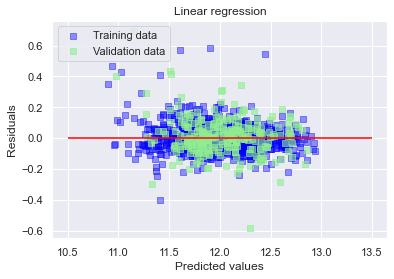

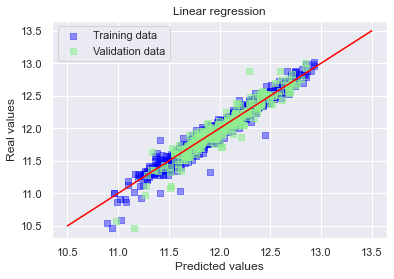

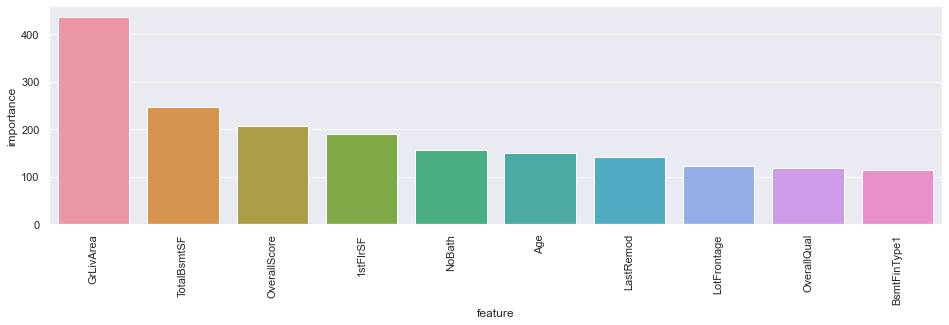

In [64]:
# Fit the training data
lgbm_hyp =  LGBMRegressor(**params_lgbm, random_state=42)
lgbm_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_lgbm = lgbm_hyp.predict(X_train)
y_test_lgbm = lgbm_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_lgbm,squared=False)
test_error = mean_squared_error(y_test, y_test_lgbm,squared=False)

print("lgbm RMSE on Training set :", train_error)
print("lgbm RMSE on Test set :", test_error)

plot_res(y_train_lgbm.reshape(1112,1),y_train,y_test_lgbm.reshape(278,1),y_test)

plot_feat3(algo=lgbm_hyp)


scores_dict['10. LGBM'].append(test_error)

**11. XGBoost**

In [65]:
from xgboost import XGBRegressor

# Hyperparameter tuning: Bayesian Optimization
def xgb_re_bo(learning_rate, gamma, max_depth, min_child_weight, subsample, colsample_bytree,n_estimators):
    params_xgb = {
    'objective': 'reg:squarederror',
    'eval_metric':'rmse',
    'nthread':-1,        
     }
    
    params_xgb['learning_rate'] = learning_rate
    params_xgb['gamma'] = gamma
    params_xgb['max_depth'] = round(max_depth)
    params_xgb['min_child_weight'] = round(min_child_weight)
    params_xgb['subsample'] = subsample
    params_xgb['colsample_bytree'] = colsample_bytree
    params_xgb['n_estimators'] = int(n_estimators)

    
    scores = cross_val_score(XGBRegressor(random_state=123, **params_xgb),
                            X_train, y_train, scoring=make_scorer(mean_squared_error,greater_is_better=False), cv=5).mean()
    score = ((scores*-1)**0.5)*-1
    return score

# Set parameters distribution
params_xgb ={
    'learning_rate': (0.01, 0.5),
    'gamma':(0, 10),
    'max_depth': (3, 15),
    'min_child_weight':(3, 10),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.1, 1),
    'n_estimators':(100, 2500)
}

# Run Bayesian Optimization
xgb_bo = BayesianOptimization(xgb_re_bo, params_xgb, random_state=123)
xgb_bo.maximize(init_points=5, n_iter=50)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1786   |  0.7268   |  2.861    |  0.1212   |  9.616    |  8.036    |  1.115e+0 |  0.9904   |
|  2        | -0.2022   |  0.7163   |  4.809    |  0.2021   |  7.118    |  8.103    |  1.153e+0 |  0.5298   |
|  3        | -0.2205   |  0.4582   |  7.38     |  0.09942  |  5.105    |  6.721    |  1.376e+0 |  0.8172   |
|  4        | -0.2213   |  0.8645   |  7.245    |  0.3094   |  11.67    |  5.261    |  968.3    |  0.6141   |
|  5        | -0.2191   |  0.3643   |  6.31     |  0.05513  |  8.204    |  6.016    |  1.285e+0 |  0.7129   |
|  6        | -0.2111   |  0.4069   |  6.587    |  0.1632   |  9.673    |  8.873    |  1.115e+0 |  0.988    |
|  7        | -0.2467   |  0.1656   |  9.974    |  0.1113   |  3.416    |  6.933    |  2.315e+0 |  0.6009   |
|  8      

|  45       | -0.2203   |  0.6633   |  7.786    |  0.2938   |  13.57    |  9.981    |  1.601e+0 |  0.8664   |
|  46       | -0.1708   |  0.7725   |  1.251    |  0.4205   |  3.882    |  8.354    |  1.618e+0 |  0.5677   |
|  47       | -0.1238   |  0.6924   |  0.05779  |  0.1177   |  9.26     |  3.218    |  504.3    |  0.7525   |
|  48       | -0.1243   |  0.4952   |  0.1413   |  0.02862  |  13.41    |  6.179    |  1.657e+0 |  0.7596   |
|  49       | -0.152    |  0.3276   |  0.9183   |  0.2993   |  5.853    |  9.921    |  1.659e+0 |  0.9397   |
|  50       | -0.2234   |  0.3317   |  8.744    |  0.1672   |  13.48    |  3.841    |  1.66e+03 |  0.8988   |
|  51       | -0.1284   |  0.8446   |  0.1056   |  0.3726   |  11.36    |  4.328    |  1.652e+0 |  0.9044   |
|  52       | -0.1367   |  0.6345   |  0.3165   |  0.4318   |  12.44    |  9.897    |  1.649e+0 |  0.7343   |
|  53       | -0.2189   |  0.8594   |  7.274    |  0.09466  |  3.68     |  8.113    |  1.899e+0 |  0.9808   |
|  54     

In [66]:
# Best hyperparameters
params_xgb = xgb_bo.max['params']
params_xgb['objective'] = 'reg:squarederror'
params_xgb['eval_metric'] = 'rmse'
params_xgb['n_jobs'] = -1
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['min_child_weight'] = round(params_xgb['min_child_weight'])
params_xgb['n_estimators'] = int(params_xgb['n_estimators'])
xgb_bo.max['params']

{'colsample_bytree': 0.8495032127098473,
 'gamma': 0.039219719905951855,
 'learning_rate': 0.08518621114129371,
 'max_depth': 4.184695416339135,
 'min_child_weight': 9.55796373650019,
 'n_estimators': 1649.6005463849756,
 'subsample': 0.9270930255326031}

xgb RMSE on Training set : 0.0653961903145002
xgb RMSE on Test set : 0.11186213683981623


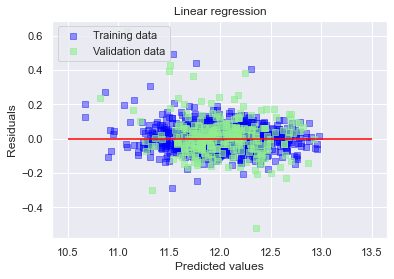

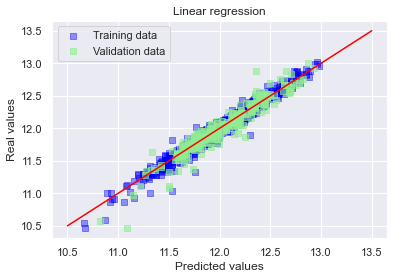

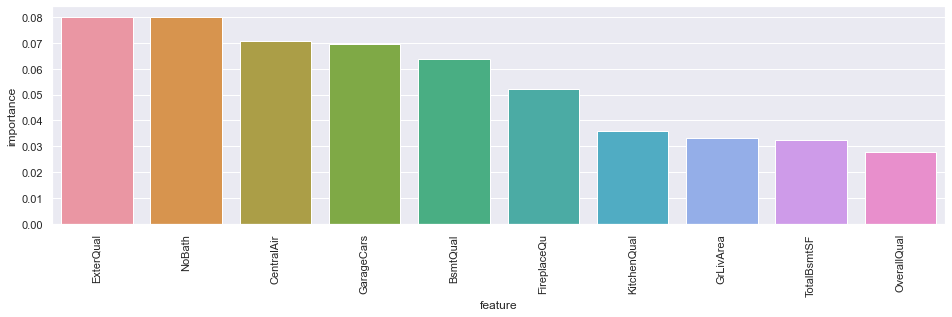

In [67]:
# Fit the training data
xgb_hyp =  XGBRegressor(**params_xgb, random_state=123)
xgb_hyp.fit(X_train, y_train)

# Predict the validation data
y_train_xgb = xgb_hyp.predict(X_train)
y_test_xgb = xgb_hyp.predict(X_test)


# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_xgb,squared=False)
test_error = mean_squared_error(y_test, y_test_xgb,squared=False)

print("xgb RMSE on Training set :", train_error)
print("xgb RMSE on Test set :", test_error)

plot_res(y_train_xgb.reshape(1112,1),y_train,y_test_xgb.reshape(278,1),y_test)
plot_feat3(algo=xgb_hyp)

scores_dict['11. XGBoost'].append(test_error)

In [68]:
pd.DataFrame.from_dict(scores_dict, orient='index', columns=['test accuracy']).sort_values(by='test accuracy', ascending=True)

test accuracy
11. XGBoost                0.111862
3. Lasso Regression        0.112385
4. Elastic Net             0.112387
9. GBM                     0.113183
2. Ridge Regression        0.116215
1. Linear Regression       0.120187
10. LGBM                   0.121173
6. SVM                     0.125667
8. Random Forest           0.132130
7. Decision Tree           0.180248
5. KNN                     0.187657

Decision Tree and KNN are above 0.18 and way behind the others.

5 models are even below 0.12  

To compense outliers we will also create different mixed models.

As we do not have any information, which performs better on the test set, we will weight them equally.

Cross feature Top 5:

RMSE on Training set : 0.0805100963289241
RMSE on Test set : 0.10808517161421496


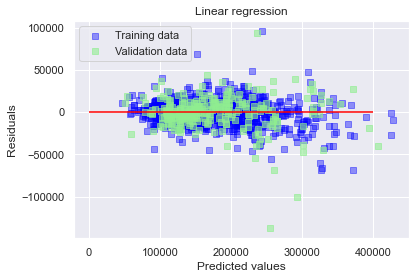

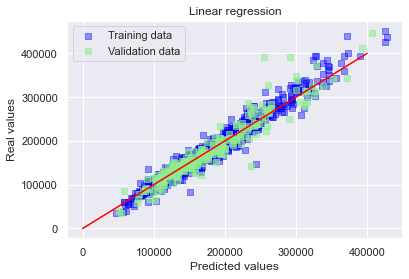

In [79]:
y_train_cross = (y_train_xgb.reshape(1112,1)+
                 y_train_las.reshape(1112,1)+
                 y_train_ela.reshape(1112,1)+
                 y_train_gbm.reshape(1112,1)+
                 y_train_rdg.reshape(1112,1))/5

y_test_cross = (y_test_xgb.reshape(278,1)+
                 y_test_las.reshape(278,1)+
                 y_test_ela.reshape(278,1)+
                 y_test_gbm.reshape(278,1)+
                 y_test_rdg.reshape(278,1))/5

# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_cross,squared=False)
test_error = mean_squared_error(y_test, y_test_cross,squared=False)

print("RMSE on Training set :", train_error)
print("RMSE on Test set :", test_error)

y_train_cross_e = np.round(np.e**y_train_cross,2)
y_test_cross_e = np.round(np.e**y_test_cross,2)
y_train_e = np.round(np.e**y_train,2)
y_test_e = np.round(np.e**y_test,2)

plot_res4(y_train_cross_e,y_train_e,y_test_cross_e,y_test_e)
#plot_res4(y_test_xgb_e.reshape(278,1),y_test_e,y_test_cross_e,y_test_e)

Cross feature Top 7:

RMSE on Training set : 0.08224432560129062
RMSE on Test set : 0.10878746308540156


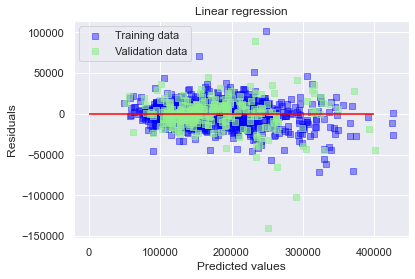

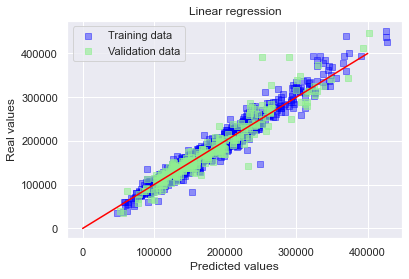

In [81]:
y_train_cross2 = (y_train_xgb.reshape(1112,1)+
                 y_train_las.reshape(1112,1)+
                 y_train_ela.reshape(1112,1)+
                 y_train_gbm.reshape(1112,1)+
                 y_train_rdg.reshape(1112,1)+
                 y_train_pred.reshape(1112,1)+
                 y_train_lgbm.reshape(1112,1)
                 )/7

y_test_cross2 = (y_test_xgb.reshape(278,1)+
                 y_test_las.reshape(278,1)+
                 y_test_ela.reshape(278,1)+
                 y_test_gbm.reshape(278,1)+
                 y_test_rdg.reshape(278,1)+
                 y_test_pred.reshape(278,1)+
                 y_test_lgbm.reshape(278,1)
                 )/7

# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_cross2,squared=False)
test_error = mean_squared_error(y_test, y_test_cross2,squared=False)

print("RMSE on Training set :", train_error)
print("RMSE on Test set :", test_error)

y_train_cross2_e = np.round(np.e**y_train_cross2,2)
y_test_cross2_e = np.round(np.e**y_test_cross2,2)

plot_res4(y_train_cross2_e,y_train_e,y_test_cross2_e,y_test_e)
#plot_res4(y_test_xgb_e.reshape(278,1),y_test_e,y_test_cross_e,y_test_e)

Cross feature Top 9:

RMSE on Training set : 0.07563662240888823
RMSE on Test set : 0.10980638864411434


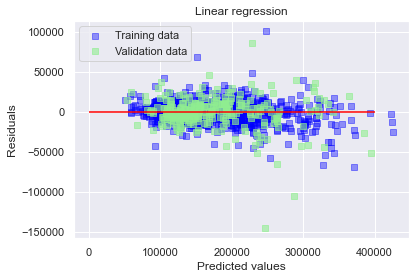

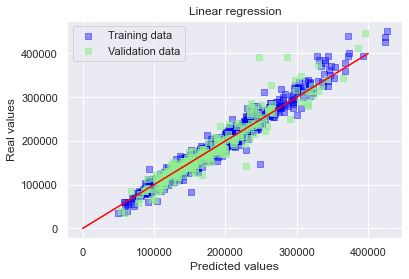

In [82]:
y_train_cross3 = (y_train_xgb.reshape(1112,1)+
                 y_train_las.reshape(1112,1)+
                 y_train_ela.reshape(1112,1)+
                 y_train_gbm.reshape(1112,1)+
                 y_train_rdg.reshape(1112,1)+
                 y_train_pred.reshape(1112,1)+
                 y_train_lgbm.reshape(1112,1)+
                 y_train_svm.reshape(1112,1)+
                 y_train_rf.reshape(1112,1) 
                 )/9

y_test_cross3 = (y_test_xgb.reshape(278,1)+
                 y_test_las.reshape(278,1)+
                 y_test_ela.reshape(278,1)+
                 y_test_gbm.reshape(278,1)+
                 y_test_rdg.reshape(278,1)+
                 y_test_pred.reshape(278,1)+
                 y_test_lgbm.reshape(278,1)+
                 y_test_svm.reshape(278,1)+
                 y_test_rf.reshape(278,1)
                 )/9

# Compute the RMSE
train_error = mean_squared_error(y_train, y_train_cross3,squared=False)
test_error = mean_squared_error(y_test, y_test_cross3,squared=False)

print("RMSE on Training set :", train_error)
print("RMSE on Test set :", test_error)


y_train_cross3_e = np.round(np.e**y_train_cross3,2)
y_test_cross3_e = np.round(np.e**y_test_cross3,2)

plot_res4(y_train_cross3_e,y_train_e,y_test_cross3_e,y_test_e)
#plot_res4(y_test_xgb_e.reshape(278,1),y_test_e,y_test_cross_e,y_test_e)

The RMSE of the Top 5 improves the accuracy of on the validation set.

Next we will try to get a mixed model, that eliminates for every data the predictor with the highest deviation from the mean of all predictors.   

In [87]:
arr = np.dstack((y_test_xgb.reshape(278 ,), y_test_las.reshape(278 ,),y_test_ela.reshape(278 ,),y_test_gbm.reshape(278 ,),y_test_rdg.reshape(278 ,)))  
arr.reshape(278 ,5)
arr=arr[0]

y_test_cross = (y_test_xgb.reshape(278,1)+
                 y_test_las.reshape(278,1)+
                 y_test_ela.reshape(278,1)+
                 y_test_gbm.reshape(278,1)+
                 y_test_rdg.reshape(278,1))/5

arr2 = arr - y_test_cross
arr3=arr.copy()

arr2 = np.absolute(arr2)

eliminator1 = np.argmax(arr2, axis=1)

for x in range(len(eliminator1)):
    arr3[x][eliminator1[x]]=0
    
arr_sum = arr3.sum(axis=1)/4


arr_sum.reshape(278,1)


test_error = mean_squared_error(y_test, arr_sum,squared=False)
print("RMSE on Test set :", test_error)

RMSE on Test set : 0.11064307963662744


### 5. Step: Discussion of results

So we have 5 models below 0.12. All models seem to make a good fit excluding the Decision Tree and KNN.
We can slightly improve the accuracy on the validation set with the mixed models, while the difference is not that big and may vary depending on the dataset. The next step to improve the accuracies would be further feature engineering and more experiments with the model hyperparameters.

Model picked 78 features and eliminated the other 114 features


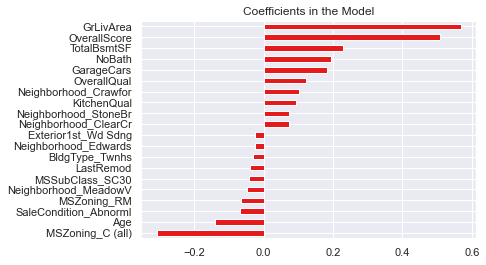

In [91]:
plot_feat2(algo=lasso)

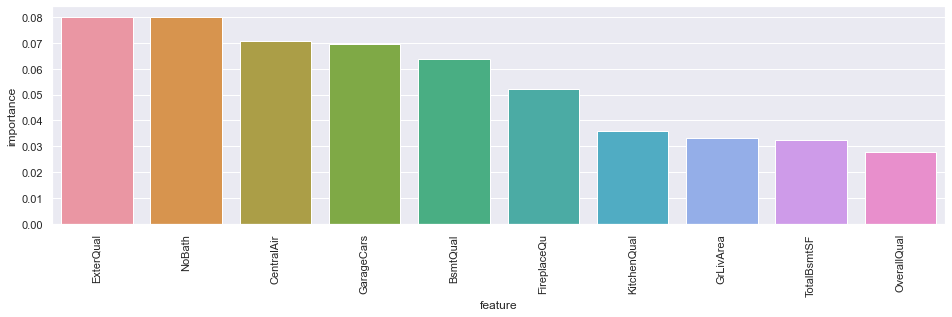

In [92]:
plot_feat3(algo=xgb_hyp)

Above we have the plot for the lasso model and the xgboost, which are the highest rated

For Lasso:

The above ground living area and the overall score are the most dominating features.  
Also Basement Area, Number of Bathrooms and the size of the Garage have an impact.  
There are more positive factors on the Sales Price, but these are the most impacting.

The most negative factor is if the house is located in a commercial zone, followed by age.

An impacting category is the Neighborhood. There is a positive influence if the house is located in Crawford, Stone Brook or Clear Creek.
On the other hand there is a negative impact if the house is located in Edwards pr Meadow Village.

For XGBoost:

The Top Features vary from Lasso in parts. Again, we can find features like NoBath, GrLivArea and OverallQual. But we also have Features like ExterQual or CentralAir, which were not in the Lasso Top-10.

For model improvement, this is why we tried some cross-over models.  
If we want to try to get a better fealing for the features and their influence on the price we could do a comprehension on the feature importance across all models. 
This is not yet part of the notebook. Perhaps I will do this at a later point.

Now, let's prepare for Submission:

In [94]:
# Get same columns as training set. 
# There might be differences due to dummies of categories not existing in the other dataset.
for x in X_train.columns:
    if x not in test.columns:
        test[x] = 0
for y in test.columns:
    if y not in X_train.columns:
        test.drop(columns={y}, inplace = True)

We will submit the Top 5 cross-over model

In [97]:
y_com_xgb = xgb_hyp.predict(test)
y_com_las = lasso.predict(test)
y_com_ela = elasticNet.predict(test)
y_com_gbm = gbm_hyp.predict(test)
y_com_rdg = ridge.predict(test)

y_com_cross = (y_com_xgb.reshape(1459 ,1)*0.2+
                 y_com_las.reshape(1459 ,1)*0.2+
                 y_com_ela.reshape(1459 ,1)*0.2+
                 y_com_gbm.reshape(1459 ,1)*0.2+
                 y_com_rdg.reshape(1459 ,1)*0.2)

y_com_cross_e = np.round(np.e**y_com_cross,2)
sample = pd.read_csv('sample_submission.csv')
submission = sample.copy()
submission['SalePrice'] = y_com_cross_e
submission.set_index('Id').to_csv('House_Price_Submission_20211116_cross.csv')

The final score is 0.14471  

I will try some improvements in a few days.